<div class="alert alert-info">Chicago Airbnb</div><p>
You and a group of friends are considering purchasing a property in Chicago that you can use as an investment. You have heard from other people that they have made a lot of money by renting out either a room or an entire unit (apartment or house). 
    <p>

Your friends ask you to analyze data so that they can understand how much you would charge per night based on the type of dwelling you were to purchase.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ydata_profiling import ProfileReport

In [2]:
import warnings
warnings.filterwarnings('ignore')

Bring in the data in and review it

In [3]:
bnb = pd.read_csv('C:/Users/jenni/Documents/MSDS/MSDS610/listings.csv')

In [4]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

In [5]:
bnb.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6.397000e+03,6397,6.397000e+03,6397,0.0,6397,6397.000000,6397.000000,6397,6397.000000,6397.000000,6397.000000,5265,5265.000000,6397.000000,6397.000000
unique,NaN,6221,NaN,1880,NaN,77,NaN,NaN,4,NaN,NaN,NaN,747,NaN,NaN,NaN
top,NaN,"UChicago, Shops + Eats, Lake | Gym + W&D | Zen...",NaN,Blueground,NaN,West Town,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-09-07,NaN,NaN,NaN
freq,NaN,14,NaN,205,NaN,725,NaN,NaN,4401,NaN,NaN,NaN,213,NaN,NaN,NaN
mean,2.813857e+07,NaN,9.850262e+07,NaN,NaN,NaN,41.899049,-87.664042,NaN,153.020009,8.113178,42.753791,NaN,1.745280,13.598718,174.272159
std,1.288337e+07,NaN,9.990222e+07,NaN,NaN,NaN,0.058929,0.042414,NaN,376.207706,22.786856,67.051609,NaN,1.745491,37.180574,138.877601
min,2.384000e+03,NaN,2.140000e+03,NaN,NaN,NaN,41.647360,-87.846810,NaN,0.000000,1.000000,0.000000,NaN,0.020000,1.000000,0.000000
25%,1.875555e+07,NaN,1.705221e+07,NaN,NaN,NaN,41.872740,-87.687460,NaN,64.000000,1.000000,2.000000,NaN,0.430000,1.000000,36.000000
50%,2.994743e+07,NaN,5.738786e+07,NaN,NaN,NaN,41.901860,-87.660880,NaN,99.000000,2.000000,15.000000,NaN,1.230000,2.000000,161.000000
75%,3.959279e+07,NaN,1.580558e+08,NaN,NaN,NaN,41.939780,-87.633160,NaN,155.000000,3.000000,56.000000,NaN,2.570000,7.000000,329.000000


In [6]:
bnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
5,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91183,-87.64000,Entire home/apt,115,4,19,2020-08-06,0.24,9,325
6,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90452,-87.63320,Entire home/apt,99,5,9,2019-01-14,0.13,1,316
7,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92335,-87.64951,Private room,289,2,4,2018-10-17,0.06,1,179
8,22362,*** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...,85811,Craig,NaN,West Town,41.89617,-87.66041,Entire home/apt,99,91,9,2014-10-12,0.11,2,365
9,24833,Private Apt 1 Block to Fullerton L Red Line - ...,101521,Red,NaN,Lincoln Park,41.92679,-87.65521,Entire home/apt,112,32,37,2018-07-29,0.29,4,180


Here's what I know so far:
<br> Neighborhood group will not be useful, as it is Null throughout.  

<p><b> Data definitions:</b></p>
<b>id </b>- The id of the airbnb--this will probably be useful
<br><b>name</b> - The name of the airbnb--not useful.  we can get rid of it
<br><b>host_id</b> - The id of the host--this is borderline useful.  We have a calculated number of listings.  Being able to correlate that to a host and possibly the neighborhood might help make a decision
<br><b>host_name</b> - The name of the host--not useful.
<br><b>neighborhood</b> - Which area is the airbnb belongs to--This is useful in respect to number of listings for the area, coupled with type of listing.
<br><b>latitude</b> - The latitude of the position--not needed
<br><b>longitude </b>- The longitude of the position--not needed
<br><b>room_type </b>- Entire home/apt, Private room or Other--this can be changed to a numeric value
<br><b>price </b>- The price of the apartment(per day)--this, coupled with minimum nights can give an idea of possible income
<br>minimum_nights</b> - The least nights you need to book--this coupled with price can give an idea of possible income
<br><b>number_of_reviews</b> - The total number of the reviews on this dataset--not useful.  May be nice for giggles
<br><b>last_review </b>- The last review time--not useful
<br><b>reviews_per_month</b> - How many reviews the airbnb can receive per month--not useful
<br><b>calculated_host_listings_count</b> - The total listing number of the host--when combined with the host and area may give an idea of where to buy
<br><b>availability_365</b> - The available days--when combined with other factors, this can give an idea of how many days is realistic<p>
The data set is incomplete and will likely not give the answers wanted. Features that would help are:<br>  number of days booked per year <br> cleaning fee <br> pets allows <br> amenitiees<br> 
<p> Having the number of days booked would allow us to determine which type of lodging is preferred, as well as which combination of variables are the best choices for this --i.e. rent out the entire space or just a room; price and required day.  A more in depth data set might include the actual rental days so we could assess what time of year is busiest.</p>

### Saving our data to postgres


In [7]:
bnb.shape

(6397, 16)

Import the packages necessary to interact with the database.

In [8]:
from sqlalchemy import create_engine

Let's establish a few variables to make our code a bit more readable.

In [9]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'BrightBlessings1!' # this is the password established during installation
port = r'5432' # default port estabalished during install
schema = r'raw' # schema we just created

In [10]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

To start with, save the entire dataset to the raw schema <br>


In [11]:
table_name = r'bnb_raw'

In [12]:
bnb.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

6397

Check to see if it did write to the db

In [13]:
sql=r'SELECT * FROM ' + schema + '.' + table_name
bnb_chk= pd.read_sql(sql, db_conn, index_col=None)

In [14]:
bnb_chk.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,None,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,None,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,None,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,None,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,None,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
5,10945,The Biddle House (#1),33004,At Home Inn,None,Lincoln Park,41.91183,-87.64000,Entire home/apt,115,4,19,2020-08-06,0.24,9,325
6,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,None,Near North Side,41.90452,-87.63320,Entire home/apt,99,5,9,2019-01-14,0.13,1,316
7,12140,Lincoln Park Guest House,46734,Sharon And Robert,None,Lincoln Park,41.92335,-87.64951,Private room,289,2,4,2018-10-17,0.06,1,179
8,22362,*** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...,85811,Craig,None,West Town,41.89617,-87.66041,Entire home/apt,99,91,9,2014-10-12,0.11,2,365
9,24833,Private Apt 1 Block to Fullerton L Red Line - ...,101521,Red,None,Lincoln Park,41.92679,-87.65521,Entire home/apt,112,32,37,2018-07-29,0.29,4,180


From pg Admin <p>
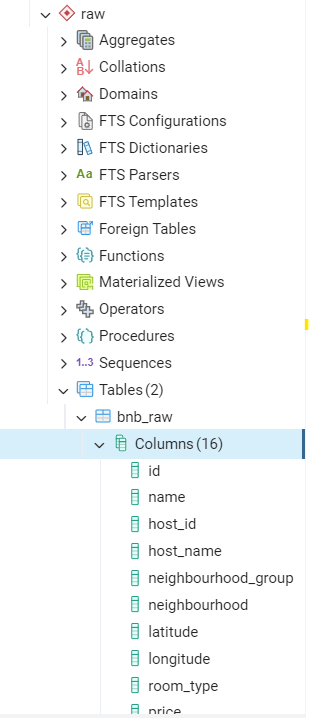

Now that I know bnb_raw is there and accessible, I need to bring in the random function and save 100 records and then remove them from the modified set.  Save the modified set to PostGres.  I'm saving to the raw schema, since the data has not been updated yet.
<br>Trying to take a random sample means checking the count of the field being used for the prediction.  There are less than 100 elements in hotel and shared room.  The first time I ran this at n=100, it did error becuase I didnt group or replace =True.
<br> I chose to group by room type.  Initially, I did 25 per group.  I found that the model accuracy dropped significantly.  I'm choosing to run this at 100 per group

In [15]:
bnbg=bnb
bnbg.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,4401,4401,4401,4401,0,4401,4401,4401,4401,4401,4401,3577,3577,4401,4401
Hotel room,73,73,73,73,0,73,73,73,73,73,73,61,61,73,73
Private room,1833,1833,1833,1833,0,1833,1833,1833,1833,1833,1833,1551,1551,1833,1833
Shared room,90,90,90,90,0,90,90,90,90,90,90,76,76,90,90


In [16]:
import random
df=bnbg.groupby('room_type')
df1=df.sample(n=100, replace=True)

# Create a new DataFrame excluding the randomly selected rows
bnb_modified = bnb.drop(df1.index)
#save the modified df
table_name = r'bnb_mod'
bnb_modified.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')


6082

In [17]:
df1.shape

(400, 16)

In [18]:
df1.to_csv('C:/Users/jenni/Documents/MSDS/MSDS610/random.csv')

bnb_modified
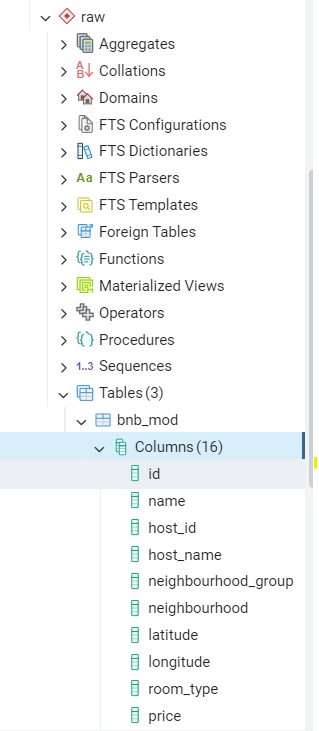

<b>Define which fields I'll be keeping and if the data types.  Data was defined in a previous cell</b>


<br>id - continuous
<br>name - remove
<br>host_id - continuous
<br>host_name - remove
<br>neighborhood -nominal
<br>latitude - remove
<br>longitude - remove
<br>room_type - nominal
<br>price - continuous
<br>minimum_nights - ordinal
<br>number_of_reviews - remove
<br>last_review - remove
<br>reviews_per_month - remove
<br>calculated_host_listings_count - discrete
<br>availability_365 - ordinal

<div class="alert alert-success"><b>Analytical question</div>

Per Christy, the question has already been asked....  
<br>Your friends ask you to analyze data so that they can understand how much you would charge per night based on the type of dwelling you were to purchase.

Based on the question and data, the following features will be needed:
<br>id--needed for calcs, but can be dropped after calcs are done
<br> room_type (nominal)--field will need to be replaced with numeric/int identifiers
<br>price (continuous)
<br>minimum_nights (ordinal)
<br>calculated field  price*min nights (minimum cost)-- this will need to be calculated by id
<br> calculated field (minimum cost)*availability (total income)--this will need to be calculated by id
<br> calculated field averge cost (min cost/number of ids)
<br> calculated field average yearly income (total income/number of ids)
<p>  Although the question being asked seems like a simple calculation, the calculated feature values will change over time to keep up with current rates and new hosts</p>
<p> I am curious on if location plays a role in prices charged, however that is outside the scope of this ML project</p>

Find out the unique values for the etl_manipulations table 

In [19]:
bnb_modified.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

<b> Postgres Table and it's values

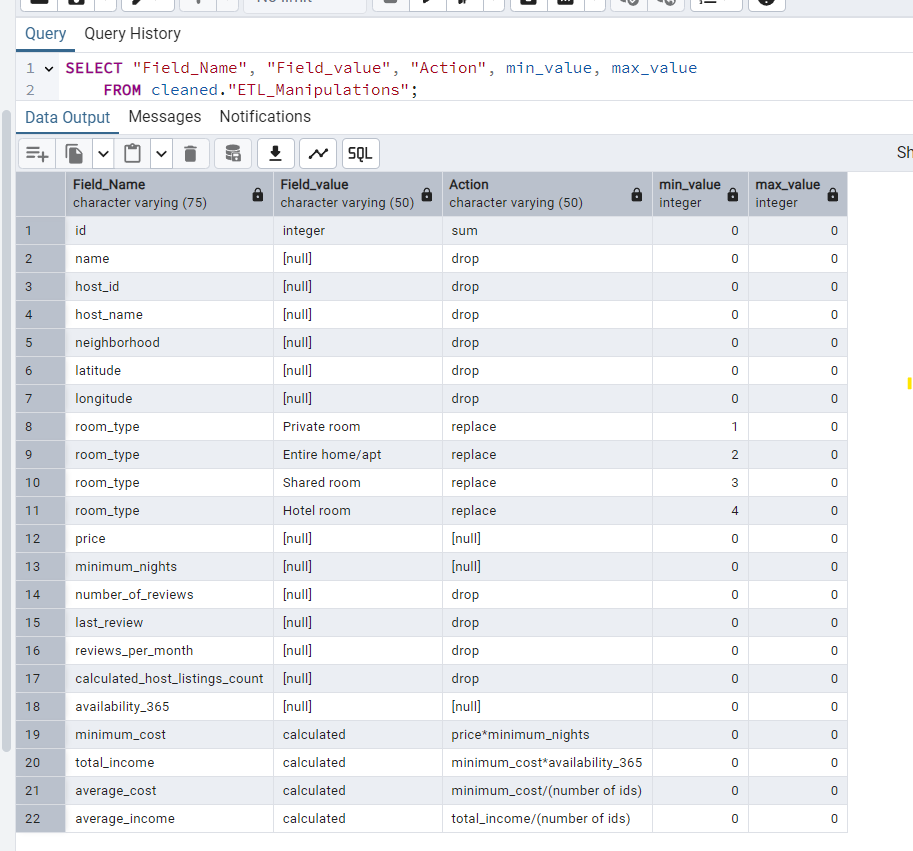

Time to pare down the data to the columns needed

In [20]:
bnb_first=bnb_modified[["id", "room_type","price","minimum_nights","availability_365"]]

In [21]:
bnb_first.describe()

,id,price,minimum_nights,availability_365
count,6.082000e+03,6082.000000,6082.000000,6082.000000
mean,2.822734e+07,152.530746,8.110490,173.142223
std,1.289698e+07,340.971432,22.487255,138.496724
min,2.384000e+03,10.000000,1.000000,0.000000
25%,1.878599e+07,65.000000,1.000000,35.000000
50%,3.015749e+07,100.000000,2.000000,160.000000
75%,3.962473e+07,156.750000,3.000000,327.000000
max,4.551558e+07,10000.000000,500.000000,365.000000


Check for NaN

In [22]:
bnb_first[bnb_first.isnull().values.any(axis=1)]

,id,room_type,price,minimum_nights,availability_365


Now that the base data is set up, its time for some EDA

<Axes: >

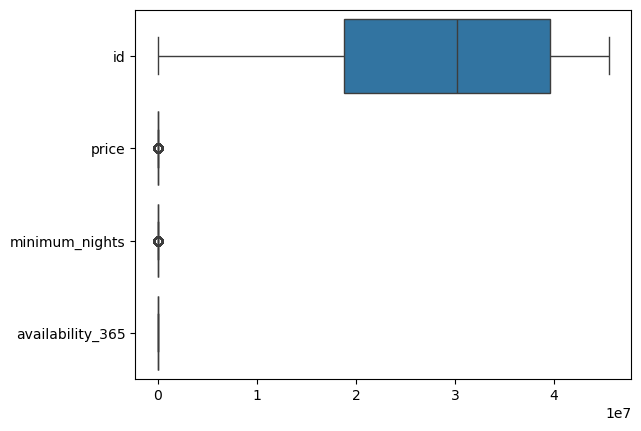

In [23]:
import seaborn as sns

sns.boxplot(data=bnb_first, orient='h')

<Axes: >

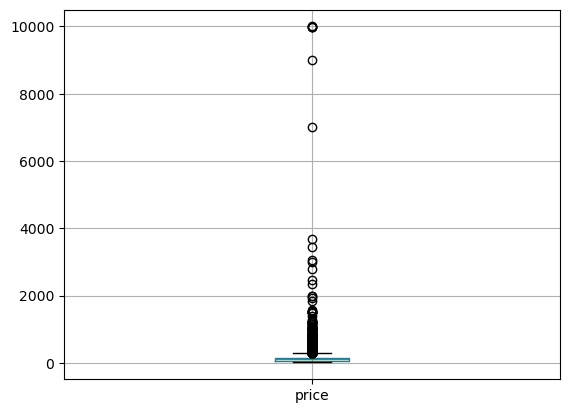

In [24]:
bnb_first.boxplot('price')

<Axes: >

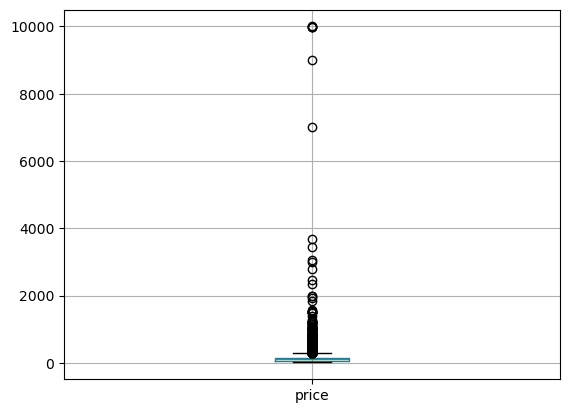

In [25]:
bnb_first.boxplot('price')

Definitely outliers.
<p>I'll plan to filter above 4000</p>

<Axes: >

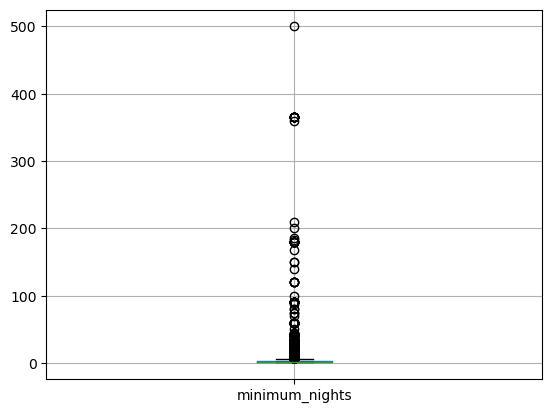

In [26]:
bnb_first.boxplot('minimum_nights')

Again, outliers.  
<p>So, it's time to assess the definition of 'B nB'.  Is it really a B n B if folks are staying longer than 3 months?  At the point minimum stay is longer than 90 days, it becomes a short term rental.  And even 90 is questionable.  </p>

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

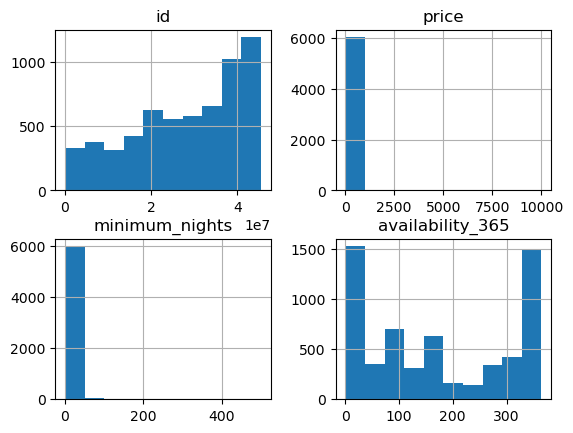

In [27]:
bnb_first.hist()

Dataframe manipulations:  convert room_type to numeric values.  Filter the price to less than 4000, filter min nights to under 91, do min cost and possible income features

In [28]:
#bnb_first['room_type'] = df['room_type'].replace({'Unknown': 0, 'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3, 'Hotel room': 4})

In [29]:
bnb_second = bnb_first[bnb_first['price'] < 4000]

In [30]:
bnb_second=bnb_second[bnb_second['minimum_nights']<91]

In [31]:
bnb_second['minimum_cost']=bnb_second['minimum_nights']*bnb_second['price']

In [32]:
bnb_second['possible_income']= bnb_second['minimum_cost']* bnb_second['availability_365']

Lets look at some EDA

<Axes: >

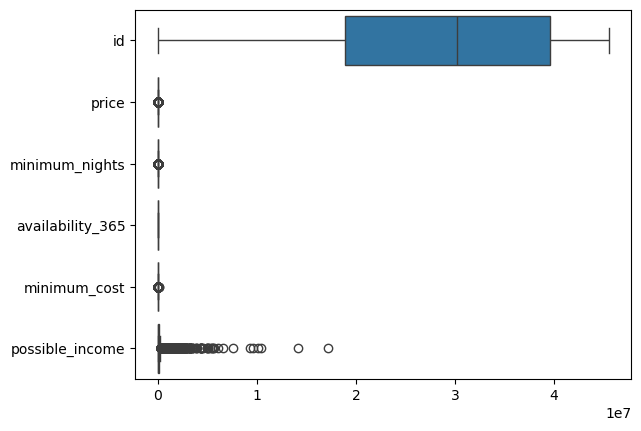

In [33]:
sns.boxplot(data=bnb_second, orient='h')

<Axes: >

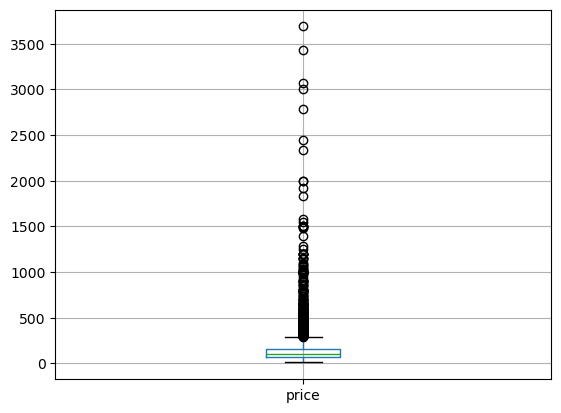

In [34]:
bnb_second.boxplot('price')

<Axes: >

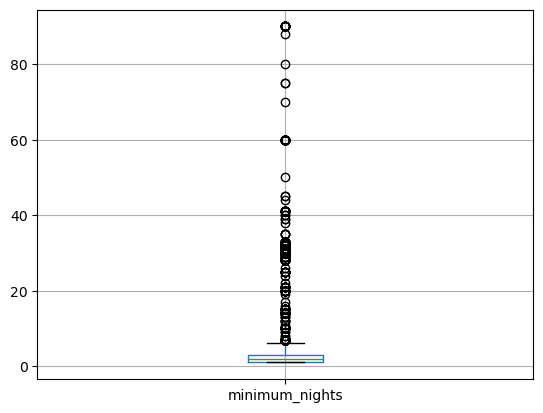

In [35]:
bnb_second.boxplot('minimum_nights')

Still have outliers, but I can deal with these.
<p> Save the cleaned data to postgres and start a new notebook</p>

In [36]:
schema = r'cleaned' # schema we just created
table_name = r'bnb_cleaned'
bnb_second.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

6039

Used for reference:<br>

https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
<p>https://stackoverflow.com/questions/43062613/how-to-randomly-select-rows-from-a-data-set-using-pandas</p>
